# Analisando dados de transporte público com Python

O objetivo deste notebook é mostrar uma forma de analisar dados de transporte público utilizando bibliotecas Python para análise de dados e análise espacial.

Primeiro, vamos importar as bibliotecas.

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

Em seguida, vamos carregar os dados de paradas de ônibus da cidade de João Pessoa. Esses dados são do OpenStreetMap e foram consultados no [Overpass Turbo](https://overpass-turbo.eu/).

In [2]:
bus_stop = gpd.read_file('data/bus_stop.geojson')

Vamos dar uma olhada nos campos que temos e em alguns registros.

In [3]:
bus_stop.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   id                1824 non-null   object  
 1   @id               1824 non-null   object  
 2   bus               922 non-null    object  
 3   highway           1824 non-null   object  
 4   public_transport  922 non-null    object  
 5   source            1760 non-null   object  
 6   departures_board  21 non-null     object  
 7   network           9 non-null      object  
 8   operator          35 non-null     object  
 9   bench             1 non-null      object  
 10  shelter           25 non-null     object  
 11  local_ref         2 non-null      object  
 12  name              21 non-null     object  
 13  name:en           8 non-null      object  
 14  name:pt           8 non-null      object  
 15  wheelchair        4 non-null      object  
 16  covered         

In [4]:
bus_stop.head()

,id,@id,bus,highway,public_transport,source,departures_board,network,operator,bench,shelter,local_ref,name,name:en,name:pt,wheelchair,covered,ref,geometry
0,node/598926783,node/598926783,yes,bus_stop,platform,SEMOB,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-34.87530 -7.13596)
1,node/598926822,node/598926822,None,bus_stop,None,SEMOB,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-34.87153 -7.13333)
2,node/601415949,node/601415949,yes,bus_stop,platform,SEMOB,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-34.85521 -7.12397)
3,node/638994781,node/638994781,None,bus_stop,None,SEMOB,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-34.84070 -7.17730)
4,node/663117711,node/663117711,yes,bus_stop,platform,SEMOB,None,None,None,None,None,None,None,None,None,None,None,None,POINT (-34.85889 -7.17118)


Certo, temos 1824 registros. São 1824 pontos de ônibus.

E temos vários campos, mas a maioria deles possui baixo preenchimento. Mas um que possui um percentual alto de valores não nulos é o source. Vamos dar uma olhada.

In [5]:
bus_stop['source'].value_counts()

SEMOB     1759
DER-PB       1
Name: source, dtype: int64

A fonte de praticamente todas é a autoridade municipal de trânsito e transportes.

Temos uma coluna de geometria. Vamos usá-la para plotar um mapa com os pontos.

<AxesSubplot:>

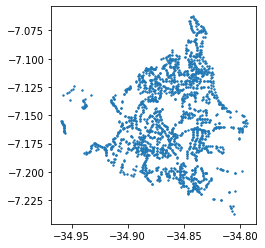

In [6]:
bus_stop.plot(markersize=2)

Falta algo aqui. Vamos usar a camada de bairros para ter uma referência espacial na visualização. Aqui, carrego uma que baixei no [site da prefeitura](https://filipeia.joaopessoa.pb.gov.br/#donwloadArquivos).

In [7]:
nbs = gpd.read_file('data/Bairros.shp')

In [8]:
nbs.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   COD_BAIRRO  64 non-null     object  
 1   N_BAIRRO    64 non-null     object  
 2   PERIMETER   64 non-null     float64 
 3   AREA        64 non-null     float64 
 4   HECTARES    64 non-null     float64 
 5   X           64 non-null     float64 
 6   Y           64 non-null     float64 
 7   DENSIDADE   9 non-null      object  
 8   geometry    64 non-null     geometry
dtypes: float64(5), geometry(1), object(3)
memory usage: 4.6+ KB


In [9]:
nbs.head()

,COD_BAIRRO,N_BAIRRO,PERIMETER,AREA,HECTARES,X,Y,DENSIDADE,geometry
0,24,ERNESTO GEISEL,6650.895993,1.905707e+06,190.570736,293606.286199,9.206173e+06,None,"POLYGON ((294146.255 9206966.645, 294257.144 9..."
1,11,BESSA,6362.909869,2.040910e+06,204.091004,296419.190791,9.218467e+06,"0,000000000","POLYGON ((296077.063 9217351.463, 296021.865 9..."
2,02,AEROCLUBE,6436.704571,2.058472e+06,205.847186,296478.971894,9.216244e+06,"0,000000000","POLYGON ((296297.691 9215023.756, 296169.512 9..."
3,35,JARDIM OCEANIA,7344.368535,2.280272e+06,228.027235,297303.595165,9.216761e+06,"0,000000000","POLYGON ((297027.095 9215073.407, 296978.970 9..."
4,38,MANAÍRA,6610.028055,2.299794e+06,229.979426,297355.595916,9.214282e+06,"0,000000000","POLYGON ((297843.104 9213327.083, 297624.521 9..."


In [10]:
nbs.crs

<Projected CRS: EPSG:31985>
Name: SIRGAS 2000 / UTM zone 25S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 36°W and 30°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-36.0, -23.8, -29.99, 4.19)
Coordinate Operation:
- name: UTM zone 25S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

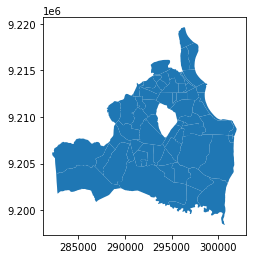

In [11]:
nbs.plot()

O sistema de coordenadas está diferente do de pontos. Vamos corrigir isso reprojetando o de pontos para coordenadas métricas.

In [12]:
bus_stop = bus_stop.to_crs("EPSG:31985")

In [13]:
bus_stop.crs

<Projected CRS: EPSG:31985>
Name: SIRGAS 2000 / UTM zone 25S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 36°W and 30°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-36.0, -23.8, -29.99, 4.19)
Coordinate Operation:
- name: UTM zone 25S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<AxesSubplot:>

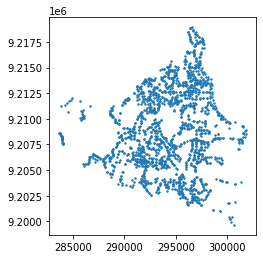

In [14]:
bus_stop.plot(markersize=2)

Maravilha! Agora podemos plotar os dois juntos.

<AxesSubplot:>

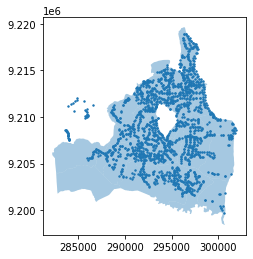

In [15]:
fig, ax = plt.subplots()
nbs.plot(ax=ax, alpha=0.4, zorder=1)
bus_stop.plot(ax=ax, markersize=2, zorder=2)

Melhor.

Bem, temos alguns pontos que não estão dentro do limite municipal. Vamos fazer uma consulta espacial para expurgá-los.

In [16]:
limit = nbs.dissolve()
bus_stop["within_jp"] = bus_stop["geometry"].apply(lambda geom: limit["geometry"].contains(geom))
bus_stop["within_jp"].value_counts()

True     1761
False      63
Name: within_jp, dtype: int64

Bem, 63 pontos não estão contidos no limite do município, obtido dissolvendo-se os polígonos do bairro em apenas um recurso.
Vamos dar uma olhada nos pontos que estão fora.

<AxesSubplot:>

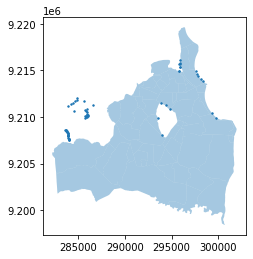

In [17]:
fig, ax = plt.subplots()
nbs.plot(ax=ax, alpha=0.4, zorder=1)
bus_stop[bus_stop["within_jp"]==False].plot(ax=ax, markersize=2, zorder=2)

É evidente que temos um problema aqui. Alguns pontos foram expurgados indevidamente. Como resolver isso? Bem, tive uma ideia. E se aplicarmos um buffer no limite de alguns metros para tentar "tolerar" pontos que não estão contidos pelo limite, mas que estão muito próximos? Vamos tentar com 150 metros.

In [18]:
limit['geometry'] = limit['geometry'].buffer(150)
bus_stop["within_jp"] = bus_stop["geometry"].apply(lambda geom: limit["geometry"].contains(geom))
bus_stop["within_jp"].value_counts()

True     1778
False      46
Name: within_jp, dtype: int64

Estamos expurgando 46 pontos. Vamos dar uma olhada no mapa.

<AxesSubplot:>

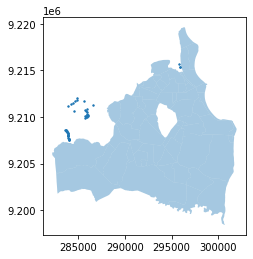

In [19]:
fig, ax = plt.subplots()
nbs.plot(ax=ax, alpha=0.4, zorder=1)
bus_stop[bus_stop["within_jp"]==False].plot(ax=ax, markersize=2, zorder=2)

Parece razoável. Temos uma máscara. Vamos aplicá-la.

E aproveitar para criar uma função que faz o plot, pra evitar repetição de código.

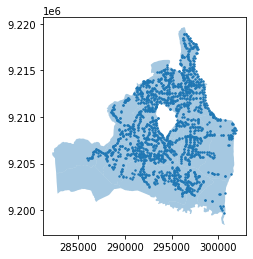

In [20]:
bus_stop = bus_stop[bus_stop["within_jp"]==True]

def plot_map(nbs, bus_stop):
    fig, ax = plt.subplots()
    nbs.plot(ax=ax, alpha=0.4, zorder=1)
    bus_stop.plot(ax=ax, markersize=2, zorder=2)

plot_map(nbs, bus_stop)

Podemos ver quantos pontos de ônibus cada bairro possui. Obviamente, vamos cair no mesmo problema, pois percebemos que pontos principalmente em alguns bairros litorâneos estão fora dos polígonos. Mas, como exercício, vamos continuar.

In [21]:
def counter(nb_geom):
    m = bus_stop["geometry"].apply(lambda stop_geom: nb_geom.contains(stop_geom))
    return m.sum()

nbs["qtde_bus_stops"] = nbs["geometry"].apply(lambda nb_geom: counter(nb_geom))

O que estamos fazendo aqui é percorrer cada bairro e aplicar a função `counter`, que por sua vez retorna a quantidade de paradas de ônibus que estão contidas por esse polígono - `m` retorna uma matriz de booleanos, então o método `sum` trará a contagem de valores verdadeiros pois `True=1` e `False=0`.

In [22]:
nbs.head()

,COD_BAIRRO,N_BAIRRO,PERIMETER,AREA,HECTARES,X,Y,DENSIDADE,geometry,qtde_bus_stops
0,24,ERNESTO GEISEL,6650.895993,1.905707e+06,190.570736,293606.286199,9.206173e+06,None,"POLYGON ((294146.255 9206966.645, 294257.144 9...",35
1,11,BESSA,6362.909869,2.040910e+06,204.091004,296419.190791,9.218467e+06,"0,000000000","POLYGON ((296077.063 9217351.463, 296021.865 9...",25
2,02,AEROCLUBE,6436.704571,2.058472e+06,205.847186,296478.971894,9.216244e+06,"0,000000000","POLYGON ((296297.691 9215023.756, 296169.512 9...",26
3,35,JARDIM OCEANIA,7344.368535,2.280272e+06,228.027235,297303.595165,9.216761e+06,"0,000000000","POLYGON ((297027.095 9215073.407, 296978.970 9...",39
4,38,MANAÍRA,6610.028055,2.299794e+06,229.979426,297355.595916,9.214282e+06,"0,000000000","POLYGON ((297843.104 9213327.083, 297624.521 9...",42


Vamos dar uma olhada nos 10 bairros com mais pontos.

<AxesSubplot:ylabel='N_BAIRRO'>

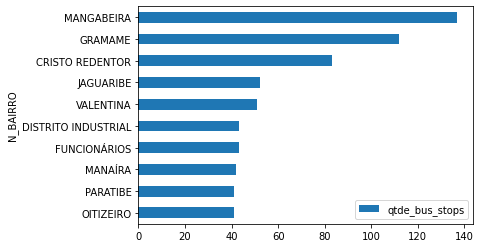

In [23]:
nbs.sort_values(by='qtde_bus_stops')[-10:].plot.barh(x='N_BAIRRO', y='qtde_bus_stops')

Os bairros de Mangabeira, Gramame e Cristo Redentor se destacam.

Um mapa cloroplético disso.

<AxesSubplot:>

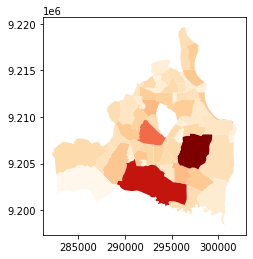

In [24]:
nbs.plot(column='qtde_bus_stops', cmap='OrRd')

Mas essa análise está enviesada pelo tamanho do bairro e, diria ainda mais precisamente, quilometragem de vias públicas dirigíveis. Obviamente que bairros com maior quilometragem de vias tendem a, via de regra, terem mais pontos de ônibus. Parece uma boa ideia tornar a medida relativa a isso. Mas como?

Bem, podemos consultar essas vias no OpenStreetMap, usando a biblioteca OSMnx.

In [25]:
import osmnx as ox
ox.config(use_cache=True)

import warnings
warnings.filterwarnings('ignore')

Vamos consultar todas as vias públicas dirigíveis de João Pessoa.

In [26]:
place = "João Pessoa, Paraíba, Brazil"
graph = ox.graph_from_place(place, network_type='drive')

streets = ox.graph_to_gdfs(graph, nodes=False)

Precisamos projetar para o sistema métrico.

In [27]:
streets = streets.to_crs("EPSG:31985")

<AxesSubplot:>

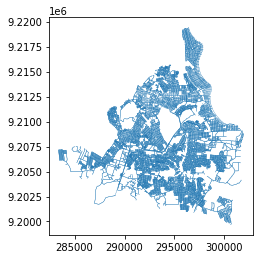

In [28]:
streets.plot(linewidth=0.3)

In [29]:
streets.crs

<Projected CRS: EPSG:31985>
Name: SIRGAS 2000 / UTM zone 25S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 36°W and 30°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-36.0, -23.8, -29.99, 4.19)
Coordinate Operation:
- name: UTM zone 25S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Ótimo! Podemos prosseguir com o cálculo. O que queremos é saber a extensão total de vias públicas dirigíveis por bairro. Tem mais de uma maneira de obtermos isso. Uma delas é cortar a camada de ruas dentro de cada bairro e calcular a soma da extensão de todos os recursos resultantes. Vamos dividir por 1000 para ter a medida em quilômetros.

In [30]:
def get_streets_extension_inside_polygon(nb_geom):
    streets_clipped = streets.clip(nb_geom)
    streets_length = streets_clipped.length
    return streets_length.sum() / 1000

nbs['streets_extension'] = nbs['geometry'].apply(lambda nb_geom: get_streets_extension_inside_polygon(nb_geom))

In [31]:
nbs.head()

,COD_BAIRRO,N_BAIRRO,PERIMETER,AREA,HECTARES,X,Y,DENSIDADE,geometry,qtde_bus_stops,streets_extension
0,24,ERNESTO GEISEL,6650.895993,1.905707e+06,190.570736,293606.286199,9.206173e+06,None,"POLYGON ((294146.255 9206966.645, 294257.144 9...",35,84.371491
1,11,BESSA,6362.909869,2.040910e+06,204.091004,296419.190791,9.218467e+06,"0,000000000","POLYGON ((296077.063 9217351.463, 296021.865 9...",25,67.819599
2,02,AEROCLUBE,6436.704571,2.058472e+06,205.847186,296478.971894,9.216244e+06,"0,000000000","POLYGON ((296297.691 9215023.756, 296169.512 9...",26,53.758972
3,35,JARDIM OCEANIA,7344.368535,2.280272e+06,228.027235,297303.595165,9.216761e+06,"0,000000000","POLYGON ((297027.095 9215073.407, 296978.970 9...",39,62.829751
4,38,MANAÍRA,6610.028055,2.299794e+06,229.979426,297355.595916,9.214282e+06,"0,000000000","POLYGON ((297843.104 9213327.083, 297624.521 9...",42,64.928861


Vamos saber agora quais bairros possuem maior quilometragem de vias.

<AxesSubplot:ylabel='N_BAIRRO'>

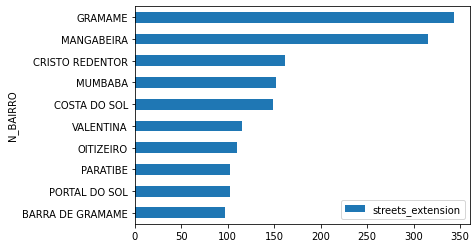

In [32]:
nbs.sort_values(by='streets_extension')[-10:].plot.barh(x='N_BAIRRO', y='streets_extension')

Os três bairros com mais paradas de ônibus aparecem mais uma vez no topo. Então, vamos ver a quantidade de pontos por quilômetro de cada bairro.

In [33]:
nbs['bus_stops_by_kilometer'] = nbs['qtde_bus_stops'] / nbs['streets_extension']

<AxesSubplot:ylabel='N_BAIRRO'>

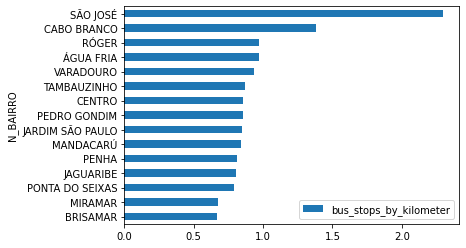

In [34]:
nbs.sort_values(by='bus_stops_by_kilometer')[-15:].plot.barh(x='N_BAIRRO', y='bus_stops_by_kilometer')

O resultado é muito diferente. O bairro São José se destaca como aquele com mais paradas de ônibus por quilômetro, o único com mais de 2. Obviamente que isso sozinho não diz muito sobre a qualidade do serviço, mas é uma medida interessante obtida por meio dessa análise espacial.

Vamos ver um mapa cloroplético dessa medida.

<AxesSubplot:>

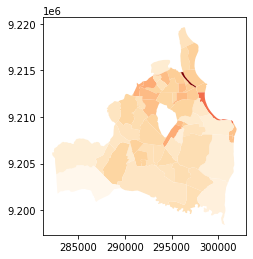

In [35]:
nbs.plot(column='bus_stops_by_kilometer', cmap='OrRd')

Sob essa medida relativa, os bairros que se destacavam na medida absoluta - Gramame, Mangabeira e Cristo Redentor - já não têm tanto destaque assim. Vamos comparar os bairros com maiores e menores medidas.

In [36]:
nbs.sort_values(by='bus_stops_by_kilometer', ascending=False).filter(items=['N_BAIRRO', 'streets_extension', 'qtde_bus_stops', 'bus_stops_by_kilometer'])

,N_BAIRRO,streets_extension,qtde_bus_stops,bus_stops_by_kilometer
31,SÃO JOSÉ,7.391984,17,2.299788
6,CABO BRANCO,28.994130,40,1.379590
33,RÓGER,29.933056,29,0.968829
54,ÁGUA FRIA,28.929387,28,0.967874
37,VARADOURO,21.400641,20,0.934551
...,...,...,...,...
63,MUMBABA,151.440706,28,0.184891
9,COSTA DO SOL,148.854697,24,0.161231
43,CIDADE DOS COLIBRIS,33.099597,5,0.151059
61,BARRA DE GRAMAME,97.229276,13,0.133705


Podemos usar ainda um gráfico de dispersão para conseguir analisar melhor essa relação.

Text(0, 0.5, 'Streets extension (km)')

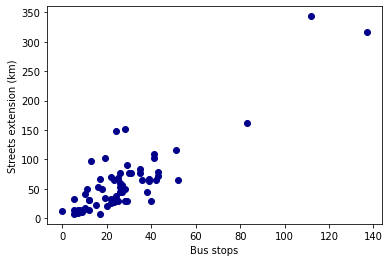

In [37]:
fig, ax = plt.subplots()
ax.scatter(x=nbs['qtde_bus_stops'], y=nbs['streets_extension'], c='DarkBlue')
ax.set_xlabel('Bus stops')
ax.set_ylabel('Streets extension (km)')

Perceba a correlação positiva.

Certo, parece óbvio. Mas é interessante atestar estatisticamente algo que parece verdade. Ás vezes até provamos o contrário. Ou encontramos casos excepcionais.

Podemos usar esses dados para relacionar com outros dados socioeconômicos e urbanos, como densidade habitacional e populacional, renda, concentração de empregos, quantidade de escolas, quantidade de praças, etc.

E pensando aqui, uma solução para a os pontos que ficaram fora dos polígonos: podemos aplicar uma função que verifica se cada um deles está a pelo menos uma dada distância de tolerância de algum polígono. Caso verdadeiro, consideramos como contido pelo polígono mais próximo, e ajustamos o campo `qtde_bus_stops` do geodataframe de bairros. Parece ok pra mim. Bem, fica como exercício para a continuidade da série.

Até mais.